In [1]:
import pandas as pd
import numpy as np

import pickle
from sklearn import preprocessing
from sklearn import metrics
from sklearn.cross_validation import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/Users/travisjames/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df_applicant = pd.read_csv('loan_app_data.csv', header=0)

In [3]:
df_applicant = df_applicant.replace(-1.0, np.nan)

In [4]:
df_applicant = df_applicant.dropna()

In [5]:
X = df_applicant.drop(['Accepted'], axis=1)
y = df_applicant['Accepted']

In [6]:
X_nozip = X.drop(['zip_code'], axis=1)

In [7]:
X_title = X_nozip['title']
X_state = X_nozip['addr_state']
X_emp = X_nozip['emp_length']
X_numerical = X_nozip[['loan_amnt', 'dti']]

In [8]:
enc = LabelEncoder()
X_title = enc.fit_transform(X_title)
X_state = enc.fit_transform(X_state)
X_emp = enc.fit_transform(X_emp)

In [9]:
X_title = pd.DataFrame(X_title)
X_state = pd.DataFrame(X_state)
X_emp = pd.DataFrame(X_emp)

In [10]:
frames = [X_numerical, X_title, X_state, X_emp]

X_final = pd.concat(frames, axis=1, join_axes=[X_title.index])

In [11]:
X_final.head(20)

,loan_amnt,dti,0,0,0
0,14000.0,15.97,9,33,4
1,25000.0,9.54,2,44,0
2,16000.0,33.18,2,38,1
3,15000.0,13.89,3,35,3
4,15000.0,13.24,2,29,6
5,24000.0,10.24,7,40,11
6,2500.0,17.60,11,9,1
7,28800.0,18.01,3,9,1
8,10000.0,10.81,2,33,2
9,35000.0,6.46,7,7,1


In [12]:
columns = ['loan_amnt', 'dti', 'title', 'addr_state', 'emp_length']
X_final.columns = columns

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size = 0.3, stratify = y)

In [16]:
gbm = xgb.XGBClassifier(max_depth = 2, n_estimators=200, learning_rate=0.1).fit(X_train, y_train)

In [17]:
y_pred = gbm.predict(X_test)
print(gbm.score(X_test, y_test))

0.949855370952


In [17]:
metrics.confusion_matrix(y_test, y_pred)

array([[767755,  20710],
       [ 25559, 100730]])

In [20]:
y_pred_proba = gbm.predict_proba(X_test)

In [18]:
precision, recall, threshold = metrics.precision_recall_curve(y_test, gbm.predict_proba(X_test)[:, 1])

In [21]:
print(metrics.precision_score(y_test, y_pred))
print(metrics.recall_score(y_test,y_pred))

0.826171954217
0.806467705026


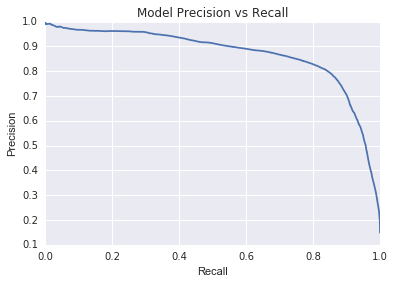

In [74]:
plt.plot(recall, precision)
plt.title('Model Precision vs Recall')
plt.xlabel('Recall')
plt.ylabel('Precision');

In [15]:
with open('loan_app/models/loan_decision.pkl', 'wb') as picklefile:
    pickle.dump(gbm, picklefile)

In [28]:
gbm.classes_

array([0, 1])

In [34]:
X_try = pd.DataFrame([[  1.20000000e+04,   2.97900000e+01,   2.00000000e+00,
          1.20000000e+01,   0.00000000e+00]], columns=columns)

In [40]:
X_try

,loan_amnt,dti,title,addr_state,emp_length
0,12000.0,29.79,2.0,12.0,0.0


In [45]:
states_frame = pd.DataFrame([[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], 
                [26], [26], [12], [13], [14], [15], [16], [17], [18], [19], [20], 
                [21], [22], [23], [24], [25], [26], [27], [28], [29], [30], [31], [32], 
                [33], [34], [35], [36], [37], [38], [39], [40], [41], [42], [43], [44], 
                [45], [46], [47], [48]])

In [67]:
loan_frame = pd.DataFrame([7000]*51)
dti_frame = pd.DataFrame([12]*51)
title_frame = pd.DataFrame([4]*51)
emp_frame = pd.DataFrame([8]*51)


In [68]:
df1 = pd.concat([loan_frame, dti_frame, title_frame, states_frame, emp_frame], axis=1, join_axes=[title_frame.index])

In [69]:
df1.columns = ['loan_amnt', 'dti', 'title', 'addr_state', 'emp_length']

In [70]:
state_wide_pred = gbm.predict_proba(df1)

In [71]:
state_wide_pred[:,1]

array([ 0.80970252,  0.80970252,  0.80970252,  0.80970252,  0.80970252,
        0.80970252,  0.80970252,  0.80970252,  0.80970252,  0.80970252,
        0.80970252,  0.80970252,  0.80970252,  0.80970252,  0.80970252,
        0.80970252,  0.80970252,  0.80970252,  0.80970252,  0.80970252,
        0.80970252,  0.80970252,  0.80970252,  0.80970252,  0.80970252,
        0.80970252,  0.80970252,  0.80970252,  0.80970252,  0.80970252,
        0.80970252,  0.80970252,  0.80970252,  0.80970252,  0.80970252,
        0.80970252,  0.80970252,  0.80970252,  0.80970252,  0.80970252,
        0.80970252,  0.80970252,  0.80970252,  0.80970252,  0.80970252,
        0.80970252,  0.80970252,  0.80970252,  0.80970252,  0.80970252,
        0.80970252], dtype=float32)